In [16]:
#import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
#import count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('clean_data.csv')

In [18]:
df.head()

,Product id,Product company,Product category,price/value,stars,Product name
0,B09MYSWLGT,SUNHZ MCKP,Tools & Home Improvement,39.99,4.7,SUNHZMCKP Magnetic Screwdriver Set 66-Piece
1,B07WQGFY3G,WORKPRO,Tools & Home Improvement,59.99,4.7,WORKPRO 12V Cordless Drill and Home Tool Kit
2,B0B3WTS82D,DEKOPRO,Tools & Home Improvement,59.99,4.6,DEKOPRO 126 Piece Power Tool Combo Kits with 8...
3,B00DQH1K2Q,DEWALT,Tools & Home Improvement,137.36,4.8,DEWALT Oscillating Tool
4,B092RM6HJF,Craftsman,Tools & Home Improvement,89.00,4.7,CRAFTSMAN V20 Cordless Multi-Tool


In [19]:
selected_features = ['Product name', 'Product company', 'Product category']
data_subset = df[selected_features]

In [20]:
data_subset['combined_features'] = data_subset.apply(lambda row: ' '.join(row.values), axis=1)


C:\Users\huzai\AppData\Local\Temp\ipykernel_2164\2700587212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['combined_features'] = data_subset.apply(lambda row: ' '.join(row.values), axis=1)


In [21]:
# Use CountVectorizer to convert text data into a feature matrix
vectorizer = CountVectorizer()
feature_matrix = vectorizer.fit_transform(data_subset['combined_features'])

In [22]:
# Calculate cosine similarity between movies
cosine_sim = cosine_similarity(feature_matrix)


In [23]:
# Create a DataFrame for the similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['Product name'], columns=df['Product name'])

In [24]:
def get_product_recommendations(product_name, top_n=10):
    similar_scores = cosine_sim_df[product_name]
    similar_product = similar_scores.sort_values(ascending=False).index[1:top_n+1]
    return similar_product


In [25]:
df.head()

,Product id,Product company,Product category,price/value,stars,Product name
0,B09MYSWLGT,SUNHZ MCKP,Tools & Home Improvement,39.99,4.7,SUNHZMCKP Magnetic Screwdriver Set 66-Piece
1,B07WQGFY3G,WORKPRO,Tools & Home Improvement,59.99,4.7,WORKPRO 12V Cordless Drill and Home Tool Kit
2,B0B3WTS82D,DEKOPRO,Tools & Home Improvement,59.99,4.6,DEKOPRO 126 Piece Power Tool Combo Kits with 8...
3,B00DQH1K2Q,DEWALT,Tools & Home Improvement,137.36,4.8,DEWALT Oscillating Tool
4,B092RM6HJF,Craftsman,Tools & Home Improvement,89.00,4.7,CRAFTSMAN V20 Cordless Multi-Tool


In [30]:

# Example: Get top 10 recommendations for a specific product
product_title = 'JOYIN 19Pcs Kids Tool Set' 
recommendations = get_product_recommendations(product_title, top_n=10)

for recommendation in recommendations:
    print('Recommendation ',recommendation)

Recommendation  JOYIN 4-in-1 Kids Tool Set
Recommendation  REXBETI 10-Piece Kids Tool Set with Real Hand Tools
Recommendation  Deejoy Tool Set with Tool Box & Electronic Toy Drill
Recommendation  Hape Fix It Kid's Wooden Tool Box and Accessory Play Set
Recommendation  Tool Set for Kids Ages 3+ Pretend Construction Playset Tools with Electronic Drill Play Tools Box Accessories Kit Gift for Toddlers Girls Boys
Recommendation  Terminal Pin Removal Tool Kit 82 Pcs Depinning Tool Electrical Connector Pin Extractor Tool Set Wire Terminal Release Tool for Automotive Car Household Devices
Recommendation  Best Choice Products Fireplace Tool Set 5pc Indoor Wrought Iron Outdoor Firepit Tool Set w/Poker
Recommendation  CRAFTSMAN Home Tool Kit / Mechanics Tool Set
Recommendation  DEKOPRO 158 Piece Tool Set-General Household Hand Tool Kit
Recommendation  DEKOPRO 228 Piece Socket Wrench Auto Repair Tool Combination Package Mixed Tool Set Hand Tool Kit with Plastic Toolbox Storage Case


C:\Users\huzai\AppData\Local\Temp\ipykernel_2164\3956405902.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cosine_sim_df.loc[product_title, recommendations], y=recommendations, palette='viridis')


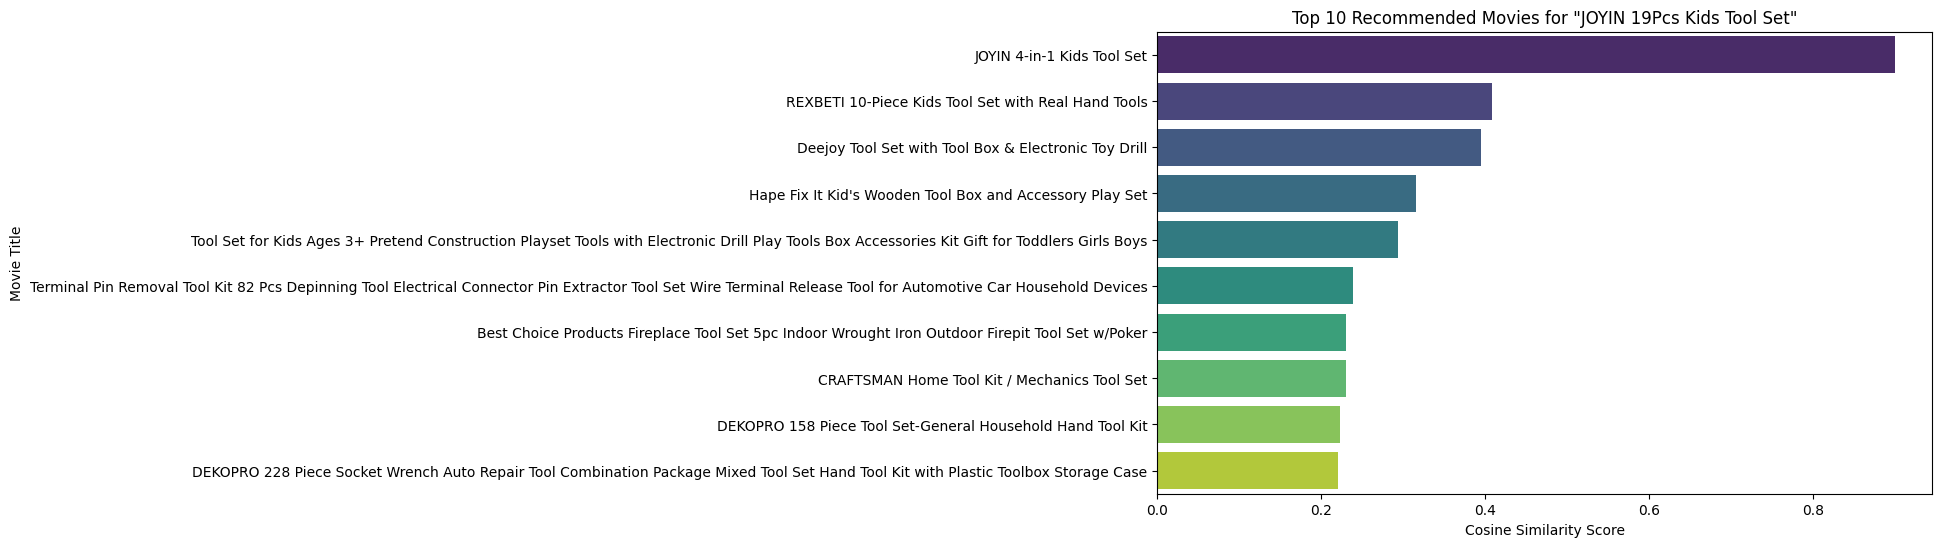

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cosine_sim_df.loc[product_title, recommendations], y=recommendations, palette='viridis')
plt.title(f'Top 10 Recommended Movies for "{product_title}"')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Movie Title')
plt.show()